# Guia da Camada de Enlace
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de enlace, além de suas funções e ferramentas

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

##### Instanciando a rede, e setando a topologia.

2024-09-10 16:41:49,939: Qubit 0 adicionado à memória do Host 0.
2024-09-10 16:41:49,947: Qubit 0 criado com fidelidade inicial 0.9149564257135194 e adicionado à memória do Host 0.
2024-09-10 16:41:49,950: Qubit 1 adicionado à memória do Host 0.
2024-09-10 16:41:49,952: Qubit 1 criado com fidelidade inicial 0.9921665474437341 e adicionado à memória do Host 0.
2024-09-10 16:41:49,954: Qubit 2 adicionado à memória do Host 0.
2024-09-10 16:41:49,968: Qubit 2 criado com fidelidade inicial 0.07799807027599848 e adicionado à memória do Host 0.
2024-09-10 16:41:49,969: Qubit 3 adicionado à memória do Host 0.
2024-09-10 16:41:49,969: Qubit 3 criado com fidelidade inicial 0.3223698721384157 e adicionado à memória do Host 0.
2024-09-10 16:41:49,970: Qubit 4 adicionado à memória do Host 0.
2024-09-10 16:41:49,971: Qubit 4 criado com fidelidade inicial 0.332817885703212 e adicionado à memória do Host 0.
2024-09-10 16:41:49,973: Qubit 5 adicionado à memória do Host 0.
2024-09-10 16:41:49,974: Qubit

Hosts inicializados
Canais inicializados


2024-09-10 16:41:50,840: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88910> adicionado ao canal.
2024-09-10 16:41:50,846: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88a30> adicionado ao canal.
2024-09-10 16:41:50,859: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88be0> adicionado ao canal.
2024-09-10 16:41:50,870: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88cd0> adicionado ao canal.
2024-09-10 16:41:50,871: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88670> adicionado ao canal.
2024-09-10 16:41:50,876: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88df0> adicionado ao canal.
2024-09-10 16:41:50,884: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88400> adicionado ao canal.
2024-09-10 16:41:50,890: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88940> adicionado ao canal.
2024-09-10 16:41:50,898: Par EPR <quantumnet.objects.epr.Epr object at 0x7f0014d88e80> adicionado ao canal.
2024-09-10 16:41:50,902: Par

Pares EPRs adicionados


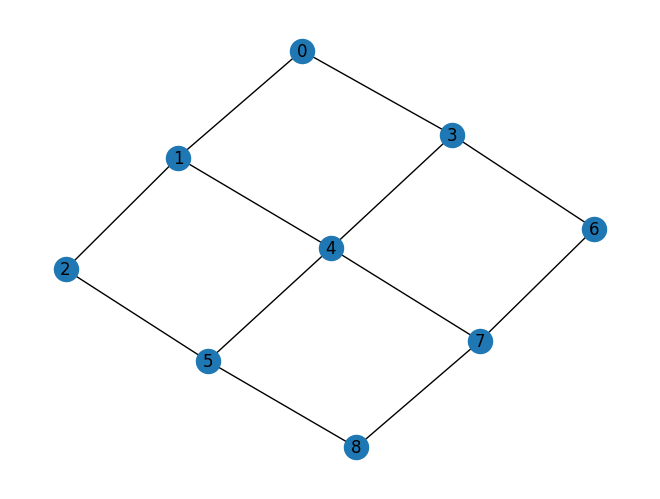

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente, e definindo os qubits que serão enviados

In [3]:
alice = rede.get_host(1)
bob = rede.get_host(2)
qubit1 = Qubit(1)
qubit2 = Qubit(2)


##### Enviando um request para o servidor, se a fidelidade dos qubits for maior que 0.5, o servidor aceita a conexão e envia a chave para o cliente, se não, é tentado novamente fazer o entrelaçamento, e se falhar novamente, o servidor tenta purificar.

In [4]:
rede.linklayer.request(1,2)

2024-09-10 16:41:53,311: Timeslot 1: Tentativa de emaranhamento entre 1 e 2.
2024-09-10 16:41:53,335: Timeslot 2: Par epr criado com fidelidade 0.10248785645050236
2024-09-10 16:41:53,341: Timeslot 3: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-09-10 16:41:53,353: Timeslot 3: Entrelaçamento falhou entre 1 e 2 na tentativa 1.
2024-09-10 16:41:53,363: Timeslot 4: Tentativa de emaranhamento entre 1 e 2.
2024-09-10 16:41:53,373: Timeslot 5: Par epr criado com fidelidade 0.015731189791335476
2024-09-10 16:41:53,380: Timeslot 6: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-09-10 16:41:53,387: Timeslot 6: Entrelaçamento falhou entre 1 e 2 na tentativa 2.
2024-09-10 16:41:53,393: A purificação utilizada foi tipo 1.
2024-09-10 16:41:53,398: Timeslot 7: Purificação falhou no canal (1, 2) devido a baixa fidelidade após purificação.


False

##### Verificando o canal do canal

In [5]:
rede.linklayer.avg_fidelity_on_linklayer()

2024-09-10 16:41:53,453: A fidelidade média dos EPRs criados na camada de enlace é 0.05910952312091892


Total de EPRs criados na camada de enlace: 2
Total de fidelidade dos EPRs criados na camada de enlace: 0.11821904624183784


0.05910952312091892

In [6]:
rede.get_total_useds_eprs()

2024-09-10 16:41:53,579: Eprs usados na camada PhysicalLayer: 2
2024-09-10 16:41:53,587: Eprs usados na camada LinkLayer: 2
2024-09-10 16:41:53,589: Eprs usados na camada NetworkLayer: 0


4

In [7]:
rede.get_total_useds_qubits()

2024-09-10 16:41:53,683: Qubits usados na camada PhysicalLayer: 4
2024-09-10 16:41:53,689: Qubits usados na camada LinkLayer: 0
2024-09-10 16:41:53,701: Qubits usados na camada TransportLayer: 0
2024-09-10 16:41:53,710: Qubits usados na camada ApplicationLayer: 0


4

In [8]:
rede.get_eprs_from_edge(1,2)

##### Verificando todos os canais

In [9]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x7f0014d56440>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x7f0014d55fc0>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x7f0014d56980>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x7f0014d56dd0>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x7f0014d573d0>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x7f0014d57280>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x7f0014d57e20>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x7f0014d88370>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x7f0014d886d0>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x7f0014d88940>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x7f0014d88d90>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x7f0014d89090>,
  <quantumnet.objects.epr.Epr at 0x7f0014d89990>]}

In [10]:
rede.get_timeslot()

7

In [11]:
# rede.total_qubits_on_simulation()

In [12]:
rede.linklayer.avg_fidelity_on_linklayer()

2024-09-10 16:41:54,337: A fidelidade média dos EPRs criados na camada de enlace é 0.05910952312091892


Total de EPRs criados na camada de enlace: 2
Total de fidelidade dos EPRs criados na camada de enlace: 0.11821904624183784


0.05910952312091892